In [33]:
import pandas as pd
import shapely.geometry as geom
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import mapping
from shapely.geometry import Polygon
import rasterio
from rasterio.mask import mask
import numpy as np
from PIL import Image
import os
%matplotlib inline

In [34]:
pics = gpd.read_file("pictures/pictures.shp")
fields = gpd.read_file("Crops_2016/Crops_2016_26910.shp")

In [35]:
fields

,OBJECTID,county_num,pk_site_id,site_id,pk_permit_,permit_num,permittee,permit_yr,p_eff_date,p_exp_date,...,loc_narr,is_active,size,size_units,crop_list,calc_acres,mtrs,hq_distric,site_distr,geometry
0,2771691,57,6129265,A14,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT RD,1,15.00,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",8.920299,M07N04E28,57,None,"POLYGON ((627126.0515120601 4254680.109899433,..."
1,3617440,57,6129266,B10,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,JEFFERSON BLVD,1,90.00,ACRES,ALFALFA,92.088548,M07N03E24,57,57,"POLYGON ((623674.3306614977 4255070.995249921,..."
2,2772757,57,6129267,B11,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,JEFFERSON X WILLOWPOINT,1,75.00,ACRES,ALFALFA,77.539027,M07N03E24,57,57,"POLYGON ((623081.1418475853 4254995.650541741,..."
3,2770898,57,6129268,B12,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT @ DEEP WATER CHANNEL,1,75.00,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",60.747020,M07N03E24,57,57,"POLYGON ((622627.8519861897 4255900.266287019,..."
4,2770899,57,6129269,B13,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT X Z-LINE,1,64.00,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",63.385837,M07N03E24,57,57,"POLYGON ((622760.1815606116 4255678.24746625, ..."
5,2771489,57,6129270,B14,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,FIELD NORTH OF B15,1,54.00,ACRES,ALFALFA,54.034062,M07N03E24,57,57,"POLYGON ((622892.503192138 4255376.402144056, ..."
6,2770078,57,6129271,B15,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT ROAD,1,43.00,ACRES,ALFALFA,46.672966,M07N03E24,57,57,"POLYGON ((623229.030603645 4254656.144788095, ..."
7,2771692,57,6129272,B16,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,LAMB,1,40.00,ACRES,ALFALFA,44.585527,M07N03E25,57,57,"POLYGON ((622897.899067756 4254381.656743138, ..."
8,2770079,57,6129273,B17,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,Z-LINE ROAD,1,56.00,ACRES,ALFALFA,59.400268,M07N03E25,57,57,"POLYGON ((622399.4683871593 4253971.797468908,..."
9,2770462,57,6129274,B3,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,1/4 MILE WEST OF JEFFERSON @ DEEP WATER CHANNEL,1,30.00,ACRES,ALFALFA,28.628593,M07N03E13,57,57,"POLYGON ((623243.2234392248 4257598.425918122,..."


In [36]:
pic1= pics.iloc[0]["geometry"]
def container(x):
    """This function applies the contain function which 
    determins if the coordinates of crop field are in a photo
    """
    return(pic1.intersects(x))
intersect_fields = fields[fields['geometry'].apply(container)]

In [9]:
geoms = intersect_fields.geometry.values
field1 =geoms[0]
json_geoms = [mapping(field1)]

In [10]:
with rasterio.open("D:\\NAIP GEOTIFF\\m_3812101_se_10_h_20160711\\m_3812101_se_10_h_20160711.tif", 'r') as src:
    out_image, out_transform = mask(src, json_geoms, crop = True)

In [11]:
x = np.swapaxes(out_image.data.transpose(),0,1)
img = Image.fromarray(x, 'RGBA')

In [ ]:
img

C:\Users\marce\Anaconda3\lib\site-packages\PIL\Image.py:2514: DecompressionBombWarning: Image size (117927300 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


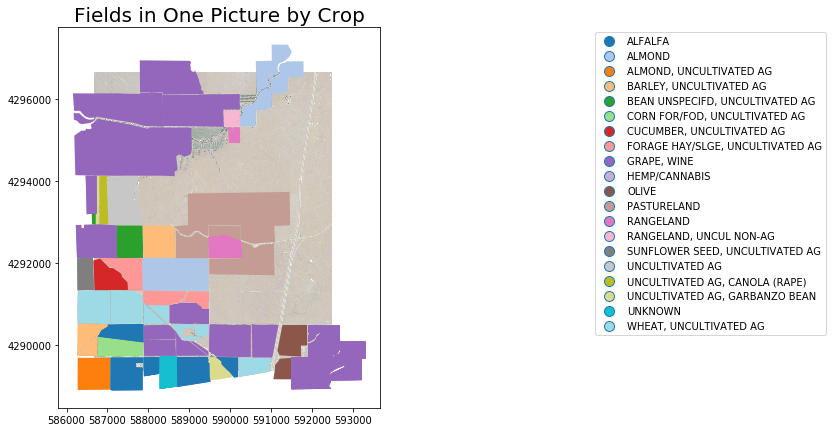

In [38]:
def plot_field(num = 0):
    path = 'D:\\NAIP GEOTIFF'
    pic_path = os.path.join(os.path.join(path, pics.iloc[num]['name'].replace('.tif', '')),pics.iloc[num]['name'] )
    def container(x):
        return(pics.iloc[num]['geometry'].intersects(x))
    intersect_fields = fields[fields['geometry'].apply(container)]
    fig, ax = plt.subplots(1, figsize=(7,7))
    plt.imshow(plt.imread(pic_path), extent= (pics.iloc[num]['geometry'].bounds[0],pics.iloc[num]['geometry'].bounds[2],pics.iloc[num]['geometry'].bounds[1],pics.iloc[num]['geometry'].bounds[3] ))
    intersect_fields.plot(ax = ax, column = 'crop_list',cmap = 'tab20',legend = True)
    l=ax.get_legend()
    l.set_bbox_to_anchor((1.5, 1, .9, 0))
    ax.set_title("Fields in One Picture by Crop", fontsize = 20)
plot_field(8)

In [ ]:
#DONT RUN THIS WILL GET EVERYTHING
path = 'D:\\NAIP GEOTIFF'
for pic in pics:
    pic_path = os.path.join(os.path.join(path, pics.iloc[0]['name'].replace('.tif', '')),pics.iloc[0]['name'] )
    def container(x):
    """This function applies the contain function which 
    determins if the coordinates of crop field are in a photo
    """
        return(pic['geometry'].intersects(x))
    intersect_fields = fields[fields['geometry'].apply(container)]
    for field in intersect_fields.geometry.values:
        new_geoms = [mapping(field)]
        picname = os.path.join(path, pic['name'])
        with rasterio.open(pic_path) as src:
            out_image, out_transform = mask(src, new_geoms, crop = True)
        x = np.swapaxes(out_image.data.transpose(),0,1)